In [199]:
sample_rate = 44100
fft_res = 64
numsteps = 256
framedur = 0.35 # (s)

The Gaussian function:
$$f(x) = a * e^{-((x - b)^2 / (2 * c^2))}$$


In [200]:
import numpy as np

ga = 1
gb = 0
gc = 0.005

gauss = lambda x: ga * np.exp(-((x - gb) ** 2) / (2 * gc ** 2))

time = np.linspace(0, 1, numsteps)
Y = np.zeros((numsteps, fft_res))
for row in range(numsteps):
    for col in range(fft_res):
        Y[row, col] = abs(row - col)

# normalize each row
Y = Y / np.max(Y, axis=1)[:, np.newaxis]
for row in range(numsteps):
    for col in range(fft_res):
        Y[row, col] = 1 - gauss(Y[row, col])
Y[1]

array([0.99449949, 0.        , 0.99449949, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [201]:
def gen_signal_from_weights(A, rate, dur):
    weights = A
    norm = np.linalg.norm(weights)
    weights = weights / norm
    frame = np.fft.irfft(weights, n=(int(rate * dur)))
    frame = np.real(frame)
    if np.max(np.abs(frame)) > 0:
        frame = frame / np.max(np.abs(frame)) * 0.9
    return frame

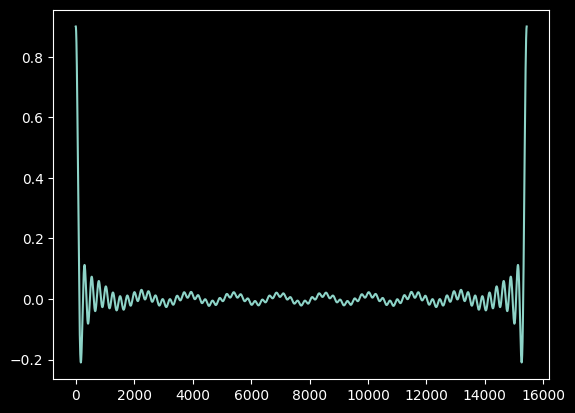

In [202]:
import matplotlib.pyplot as plt

frame = gen_signal_from_weights(Y[10], sample_rate, framedur)
plt.plot(frame)

In [203]:
import sounddevice as sd

output = np.array([], dtype=np.float32)
for x in range(20):
    frame = gen_signal_from_weights(Y[x], sample_rate, framedur)
    output = np.concatenate((output, frame))

sd.play(output * 100, sample_rate)
sd.wait()